In [1]:
from sympy import *
import math
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)

In [2]:
def f(x, y):
    return cos(2*x) + sin(3*x)

In [3]:
def Euler (a, b, n, A):
    h = (b - a)/n
    t = a
    w = A
    tlist = [a]
    wlist = [A]
    for i in range (1, n + 1):
        k1 = f(t, w)
        w = w + h * f(t, w)
        t = a + i * h
        wlist.append(w)
        tlist.append(t)
        #print('t = ', t, 'w = ', w)
    return tlist, wlist

In [4]:
def heun2 (a, b, n, A):
    h = (b - a)/n
    t = a
    w = A
    tlist = [a]
    wlist = [A]
    for i in range (1, n + 1):
        k1 = f(t, w)
        k2 = f(t + h, w + k1 * h)
        slope = (k1 + k2)/2
        w = w + h * slope
        t = a + i * h
        wlist.append(w)
        tlist.append(t)
        #print('t = ', t, 'w = ', w)
    return tlist, wlist

In [5]:
def RK4 (a, b, n, A):
    h = (b - a)/n
    t = a
    w = A
    tlist = [a]
    wlist = [A]
    for i in range (1, n + 1):
        K1 = h * f(t, w)
        K2 = h * f(t + h/2, w + K1/2)
        K3 = h * f(t + h/2, w + K2/2)
        K4 = h * f(t + h, w + K3)
        w = w + (K1 + 2*K2 + 2*K3 + K4)/6
        t = a + i * h
        wlist.append(w)
        tlist.append(t)
        #print('t = ', t, 'w = ', w)
    return tlist, wlist

In [6]:
tlist, wlist = Euler (0, 10, 40, 1)

In [7]:
ttlist, wwlist = heun2 (0, 10, 40, 1)

In [8]:
tttlist, wwwlist = RK4 (0, 10, 40, 1)

In [9]:
def realy(t):
    return (1/2 * sin(2*t) - 1/3 * cos(3*t) + 4/3).evalf()

In [10]:
xxxxlist = []
yyyylist = []
for i in range (1, 40):
    t = 0.25 + 0.25*i
    xxxxlist.append(t)
    yyyylist.append(realy(t))
#print('t = ', xxxxlist, 'w = ', yyyylist)

In [11]:
nn = len(tlist)
ylist = []
yylist = []
yyylist = []
erlist = []
errlist = []
errrlist = []
for i in range (0, nn):
    truey = realy(tlist[i])
    ylist.append(truey)
    erlist.append(abs(truey - wlist[i]))
    trueyy = realy(ttlist[i])
    yylist.append(trueyy)
    errlist.append(abs(trueyy - wwlist[i]))
    trueyyy = realy(tttlist[i])
    yyylist.append(trueyyy)
    errrlist.append(abs(trueyyy - wwwlist[i]))

In [12]:
figtitle = 'Table 1'
title_top = '__________________________________________________________________________'
title_bot = '__________________________________________________________________________'
my_string = 'ti          wi          yi          Euler error        Heun2 error       RK4 error'

In [13]:
print(figtitle)
print(title_top)
print(my_string)
print(title_bot)
for i in range (0, nn):
    print ('%.2f  %.10f  %.10f  %.10f  %.10f  %.10f'%(tlist[i], wlist[i], ylist[i], erlist[i], errlist[i], errrlist[i]))

Table 1
__________________________________________________________________________
ti          wi          yi          Euler error        Heun2 error       RK4 error
__________________________________________________________________________
0.00  1.0000000000  1.0000000000  0.0000000000  0.0000000000  0.0000000000
0.25  1.2500000000  1.3291498130  0.0791498130  0.0092471478  0.0000152339
0.50  1.6398053305  1.7304897585  0.0906844280  0.0234597665  0.0000438078
0.75  2.0242546536  2.0414720342  0.0172173806  0.0361160808  0.0000715432
1.00  2.2364572532  2.1179795456  0.1184777076  0.0409006459  0.0000840544
1.25  2.1677005461  1.9060891912  0.2616113549  0.0349767618  0.0000743462
1.50  1.8245243125  1.4741586038  0.3503657087  0.0205746181  0.0000466368
1.75  1.3326436590  0.9872465604  0.3453970986  0.0040267990  0.0000143368
2.00  0.8837958638  0.6348753235  0.2489205403  0.0072881505  0.0000067899
2.25  0.6505310840  0.5468994929  0.1036315911  0.0085376254  0.0000067015
2.50  0.7

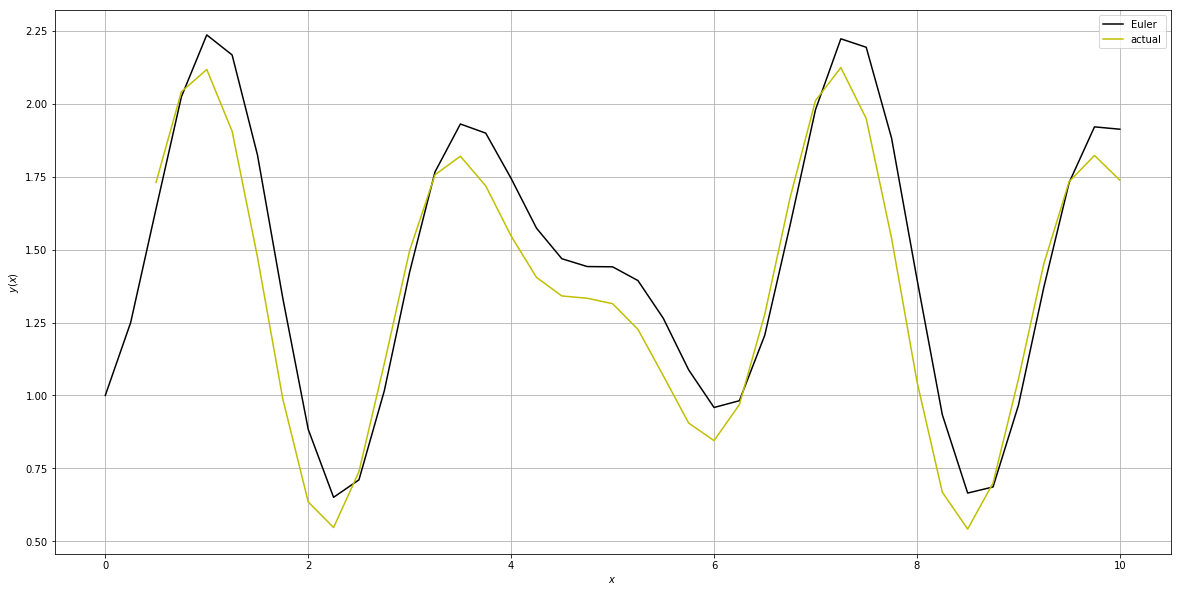

In [19]:
plt.figure(figsize = (20,10))
plt.plot(tlist, wlist, color = "k", label = "Euler")
#plt.plot(ttlist, wwlist, color = "r", label = "Heun2")
#plt.plot(tttlist, wwwlist, color = "b", label = "RK4")
plt.plot(xxxxlist, yyyylist, color = "y", label = "actual")
plt.plot()
plt.xlabel('$x$')
plt.ylabel('$y(x)$')
plt.legend()
plt.grid(True)
plt.show()

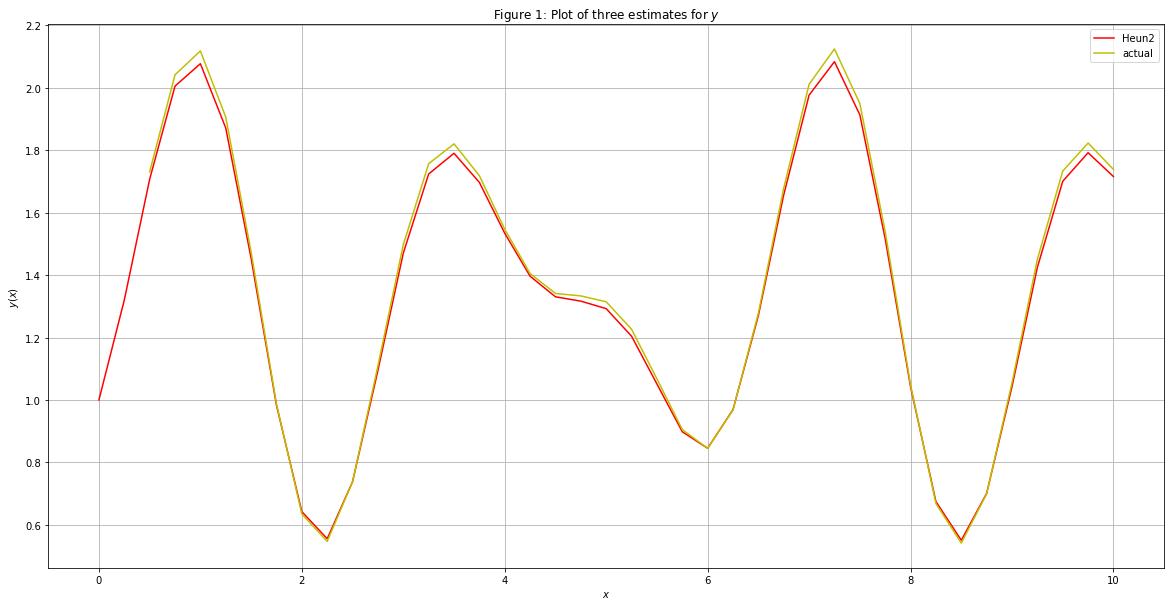

In [20]:
plt.figure(figsize = (20,10))
#plt.plot(tlist, wlist, color = "k", label = "Euler")
plt.plot(ttlist, wwlist, color = "r", label = "Heun2")
#plt.plot(tttlist, wwwlist, color = "b", label = "RK4")
plt.plot(xxxxlist, yyyylist, color = "y", label = "actual")
plt.plot()
plt.xlabel('$x$')
plt.ylabel('$y(x)$')
plt.title("Figure 1: Plot of three estimates for $y$")
plt.legend()
plt.grid(True)
plt.show()

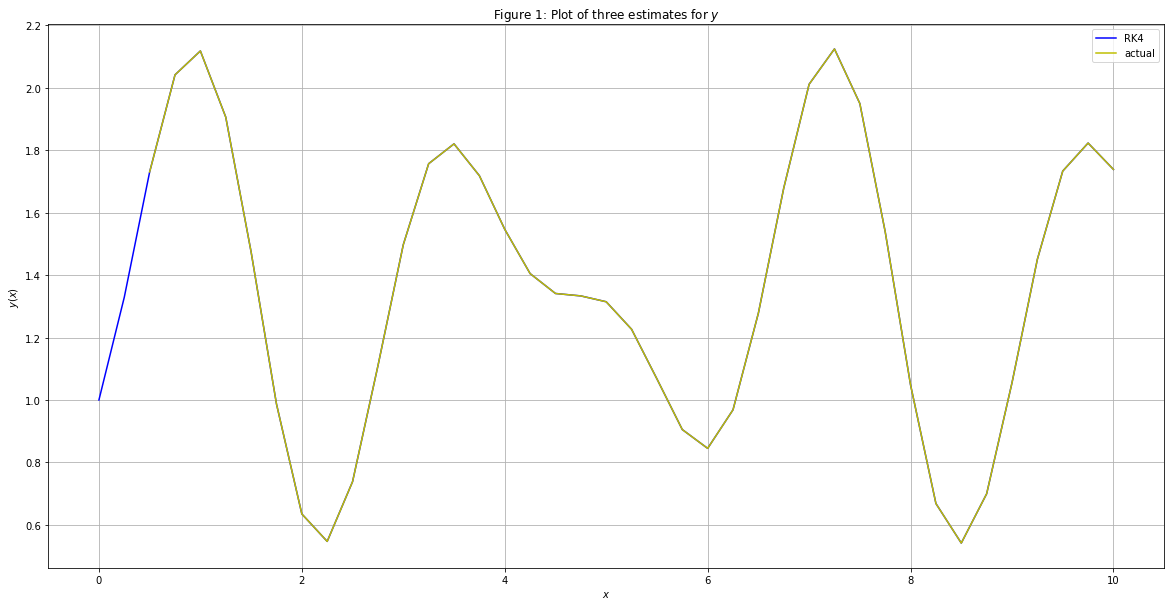

In [21]:
plt.figure(figsize = (20,10))
#plt.plot(tlist, wlist, color = "k", label = "Euler")
#plt.plot(ttlist, wwlist, color = "r", label = "Heun2")
plt.plot(tttlist, wwwlist, color = "b", label = "RK4")
plt.plot(xxxxlist, yyyylist, color = "y", label = "actual")
plt.plot()
plt.xlabel('$x$')
plt.ylabel('$y(x)$')
plt.title("Figure 1: Plot of three estimates for $y$")
plt.legend()
plt.grid(True)
plt.show()